In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
import collections.abc
collections.Iterable = collections.abc.Iterable
from astrodendro import Dendrogram
from astrodendro import structure
import pandas as pd

In [3]:
cgs_mp = 9.10938291e-28
cgs_me = 9.10938291e-28 
cgs_xmh =  cgs_mp + cgs_me
yHe = 9.7222222e-2 
mu = (1.e0+4.e0*yHe)*cgs_xmh


In [4]:
def get_data(filename):
  d = {}
  with h5py.File(filename, "r") as data:
    data_list = list(data)
    for ls in data_list:
      d[ls] = data[ls][()]
  return d

In [5]:
d = get_data('C:/Users/kotor/StarGen/datasets/data_ppp/cb1000.h5')

hx = d['space1']
hy = d['space2']
hz = d['space3']

nH = d['nH']
rho = nH*mu

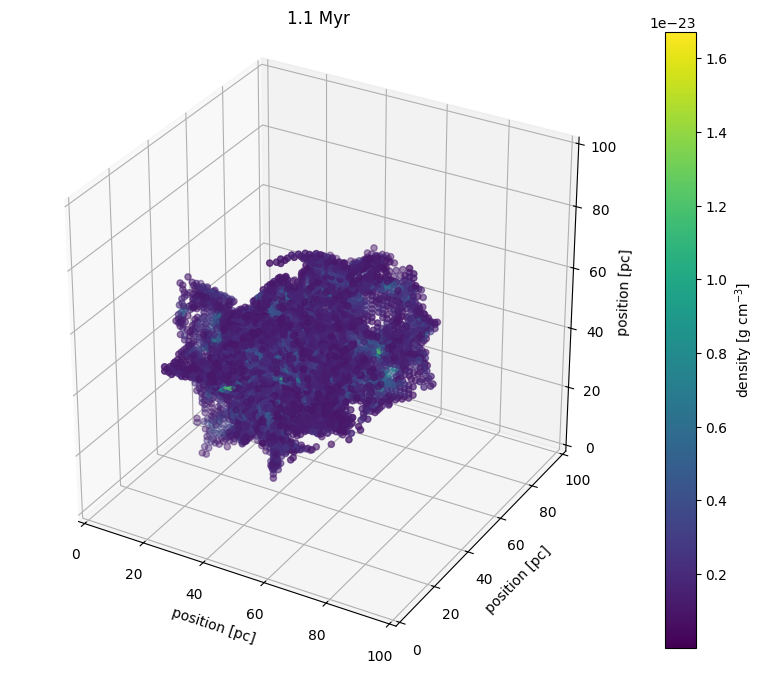

In [6]:
# make 3D map

shape = rho.shape
gas_density = rho.reshape(-1)
colormap = plt.get_cmap('viridis')
norm = plt.Normalize(gas_density.min(), gas_density.max())

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((1,1,1))

x_coords = np.repeat(np.arange(shape[0]), shape[1]*shape[2]) * hx
y_coords = np.tile(np.repeat(np.arange(shape[1]), shape[2]), shape[0]) * hy
z_coords = np.tile(np.arange(shape[2]), shape[0]*shape[1]) * hz

threshold = 1 * 10**-24
mask= gas_density > threshold

x_filtered = x_coords[mask]
y_filtered = y_coords[mask]
z_filtered = z_coords[mask]
gas_mass_filtered = gas_density[mask]

scatter = ax.scatter(x_filtered, y_filtered, z_filtered, c=gas_mass_filtered, cmap=colormap, norm=norm)  

cbar = plt.colorbar(scatter, ax=ax, orientation='vertical')
cbar.set_label('density [g cm$^{-3}$]')

ax.set_xlim3d(0, 100)
ax.set_ylim3d(0, 100)
ax.set_zlim3d(0, 100)

plt.title("1.1 Myr")

X = ax.set_xlabel('position [pc]')
Y = ax.set_ylabel('position [pc]')
Z = ax.set_zlabel('position [pc]')

#plt.savefig("3Dmap_400")

In [7]:
dendro = Dendrogram.compute(rho, min_value=2*10**-24, min_delta=1*10**-24, min_npix=20)

In [8]:
leaf_indices = [i for i, structure in enumerate(dendro.all_structures) if structure.is_leaf]
branch_indices = [j for j, structure in enumerate(dendro.all_structures) if structure.is_branch]

print(leaf_indices)
print(branch_indices)
print(len(leaf_indices))
print(len(branch_indices))

[1, 3, 7, 9, 13, 14, 15, 16, 17, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 37, 38, 39, 41, 42, 44, 45, 46]
[0, 2, 4, 5, 6, 8, 10, 11, 12, 18, 19, 24, 31, 36, 40, 43]
31
16


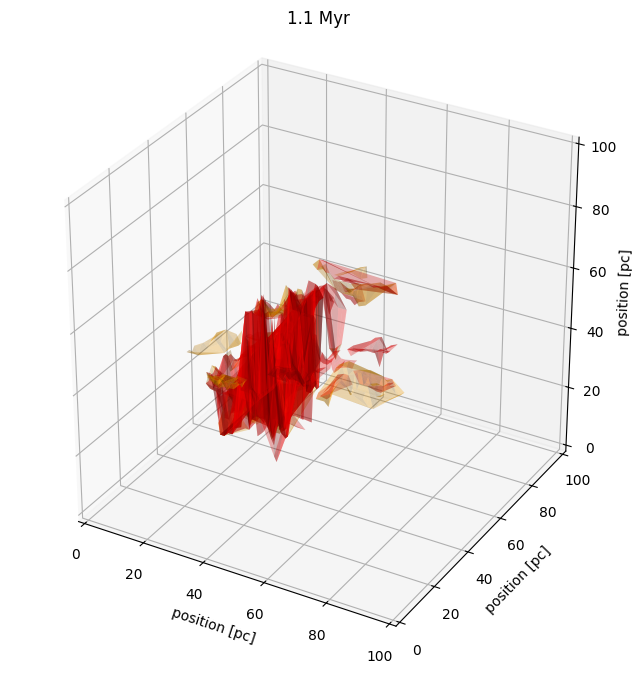

In [9]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((1,1,1))

for i, structure_index in enumerate(leaf_indices):
    structure = dendro[structure_index]
    mask = structure.get_mask()
    indices = np.where(mask)
    ax.plot_trisurf(indices[0] * hx, indices[1] * hy, indices[2] * hz, color='red', alpha=0.3)
    
for j, structure_index in enumerate(branch_indices):
    structure = dendro[structure_index]
    mask = structure.get_mask()
    indices = np.where(mask)
    ax.plot_trisurf(indices[0] * hx, indices[1] * hy, indices[2] * hz, color='orange', alpha=0.3)

ax.set_xlim3d(0, 100)
ax.set_ylim3d(0, 100)
ax.set_zlim3d(0, 100)

plt.title("1.1 Myr")

X = ax.set_xlabel('position [pc]')
Y = ax.set_ylabel('position [pc]')
Z = ax.set_zlabel('position [pc]')

#plt.savefig("dendro3D_400_contour")

In [20]:
# make peaks list

x_peak, y_peak, z_peak, peak_value = [], [], [], []
for s in dendro.leaves:
    x_ch, y_ch, z_ch = s.get_peak()[0]
    value = s.get_peak()[1]
    x_peak.append(round(float(x_ch), 6))
    y_peak.append(round(float(y_ch), 6))
    z_peak.append(round(float(z_ch), 6))
    peak_value.append(round(float(value), 30))

x_peak = np.array(x_peak) * hx
y_peak = np.array(y_peak) * hy
z_peak = np.array(z_peak) * hz

peak = pd.DataFrame({'x_peak':x_peak, 'y_peak':y_peak, 'z_peak':z_peak, 'peak_value':peak_value})

display(peak)

,x_peak,y_peak,z_peak,peak_value
0,19.379883,38.759766,42.912598,9.670936e-24
1,17.995605,35.991211,30.454102,6.784381e-24
2,20.764160,52.602539,33.222656,1.173679e-23
3,24.916992,41.528320,15.227051,7.013190e-24
4,23.532715,45.681152,20.764160,1.131985e-23
5,29.069824,52.602539,29.069824,1.471970e-23
6,29.069824,31.838379,34.606934,1.205982e-23
7,31.838379,48.449707,44.296875,5.791252e-24
8,33.222656,24.916992,41.528320,4.662966e-24
9,33.222656,29.069824,29.069824,6.376611e-24


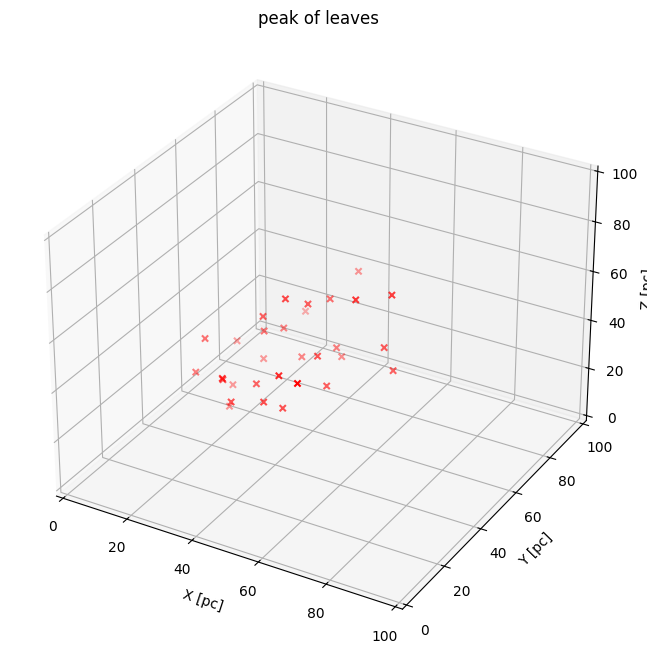

In [21]:
# plot the peaks

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(peak['x_peak'], peak['y_peak'], peak['z_peak'], marker='x', color='red')

ax.set_xlim3d(0, 100)
ax.set_ylim3d(0, 100)
ax.set_zlim3d(0, 100)

plt.title('peak of leaves')

X = ax.set_xlabel('X [pc]')
Y = ax.set_ylabel('Y [pc]')
Z = ax.set_zlabel('Z [pc]')

#plt.savefig('dendro3D_400_peak')

In [22]:
# plot by plotly

fig = px.scatter_3d(peak, x='x_peak', y='y_peak', z='z_peak')

# Leaf structures
for i, leaf_structure_index in enumerate(leaf_indices):
    leaf_structure = dendro[leaf_structure_index]
    leaf_mask = leaf_structure.get_mask()
    leaf_mask_indices = np.where(leaf_mask)
    mesh_leaf = go.Mesh3d(x=leaf_mask_indices[0] * hx, 
                          y=leaf_mask_indices[1] * hy, 
                          z=leaf_mask_indices[2] * hz, 
                          opacity=0.3,
                          color='red',
                          name=f'Leaf {i + 1} - Surface')
    fig.add_trace(mesh_leaf)

# Branch structures
for j, branch_structure_index in enumerate(branch_indices):
    branch_structure = dendro[branch_structure_index]
    branch_mask = branch_structure.get_mask()
    branch_mask_indices = np.where(branch_mask)
    mesh_branch = go.Mesh3d(x=branch_mask_indices[0] * hx, 
                            y=branch_mask_indices[1] * hy, 
                            z=branch_mask_indices[2] * hz,
                            opacity=0.3, 
                            color='orange',
                            name=f'Branch {j + 1} - Surface')
    fig.add_trace(mesh_branch)

fig.update_layout(
    scene=dict(
        xaxis=dict(title='X [pc]', range=[0, 100]),
        yaxis=dict(title='Y [pc]', range=[0, 100]),
        zaxis=dict(title='Z [pc]', range=[0, 100]),
        aspectratio=dict(x=1, y=1, z=1)
    ),
    title='Structure Contours in 3D with Mesh Surface',
    margin=dict(l=0, r=0, b=0, t=40),
    showlegend=True)


In [11]:
leaf_npix, branch_npix = [], []

for structure_index in leaf_indices:
    structure = dendro[structure_index]
    npix = structure.get_npix()
    leaf_npix.append(npix)
    
for structure_index in branch_indices:
    structure = dendro[structure_index]
    npix = structure.get_npix()
    branch_npix.append(npix)

leaf_sizes = [npix * hx * hy * hz for npix in leaf_npix]
branch_sizes = [npix * hx * hy * hz for npix in branch_npix]

print(leaf_sizes)
print(branch_sizes)

[2753.3833780616987, 2103.5000181145733, 1175.0952181901084, 2246.739615817205, 164.46027884376235, 360.75157939922065, 1026.550450202194, 68.96721370867454, 61.00945828075055, 74.27238399395719, 225.4697371245129, 190.98613027017564, 124.67150170414243, 58.35687313810922, 84.8827245645225, 63.66204342339188, 790.4703725071158, 63.66204342339188, 55.704287995467894, 103.4508205630118, 297.08953597582877, 84.8827245645225, 342.18348340073135, 79.57755427923985, 129.97667198942509, 124.67150170414243, 143.23959770263173, 82.23013942188118, 106.10340570565313, 196.2913005554583, 103.4508205630118]
[143.23959770263173, 79.57755427923985, 135.28184227470774, 68.96721370867454, 1352.8184227470774, 700.2824776573107, 265.2585142641328, 164.46027884376235, 135.28184227470774, 68.96721370867454, 389.93001596827526, 111.40857599093579, 66.3146285660332, 251.9955885509262, 58.35687313810922, 342.18348340073135]


In [12]:
# calculate average of size

leaf_size_ave = np.sum(leaf_sizes) / 31
branch_size_ave = np.sum(branch_sizes) / 16

print(leaf_size_ave)
print(branch_size_ave)

435.02396339317784
270.89525769224565


In [13]:
# check the density of structures

density_per_leaf, density_per_branch = [], []

for structure_index in leaf_indices:
    structure = dendro[structure_index]
    mask = structure.get_mask()
    indices = np.where(mask)
    leaf_mass = np.sum(rho[indices])
    density_per_leaf.append(leaf_mass)
    
for structure_index in branch_indices:
    structure = dendro[structure_index]
    mask = structure.get_mask()
    indices = np.where(mask)
    branch_mass = np.sum(rho[indices])
    density_per_branch.append(branch_mass)

total_density_leaf = np.sum(density_per_leaf)
total_density_branch = np.sum(density_per_branch)

print(density_per_leaf)
print(total_density_leaf)
print(density_per_branch)
print(total_density_branch)

[3.770789437368017e-21, 3.0729111283967438e-21, 1.8841650272308137e-21, 3.2708741222406996e-21, 2.6980845323092047e-22, 6.737282168412737e-22, 1.690356600496636e-21, 9.054545367901198e-23, 6.967110112619348e-23, 1.518759028536247e-22, 3.803522541809573e-22, 3.4326205771429945e-22, 1.466336592438763e-22, 1.093196449434016e-22, 1.3230892132731054e-22, 9.042971642939303e-23, 1.299497440014834e-21, 1.117288700060392e-22, 5.844221848475631e-23, 1.6424051351122852e-22, 3.837272811218305e-22, 9.960251997374518e-23, 4.389461016354993e-22, 1.0158658357960873e-22, 1.628119973468295e-22, 1.4460437308954799e-22, 1.7047699860345764e-22, 1.472784204297713e-22, 1.1558848472235827e-22, 2.742229765200393e-22, 1.7479271041696995e-22]
1.9994579186759687e-20
[1.8472844075678198e-22, 1.0499489645238898e-22, 1.8996648248385175e-22, 9.691897350179465e-23, 2.0963419097650324e-21, 1.1619372844049019e-21, 3.7440612913048365e-22, 3.229115167608302e-22, 2.694935656257743e-22, 7.667203154678116e-23, 6.143984080196

In [14]:
# calculate average of density

leaf_density_ave = total_density_leaf / 31
branch_density_ave = total_density_branch / 16

print(leaf_density_ave)
print(branch_density_ave)

6.449864253793448e-22
4.1133712251362606e-22
